<a href="https://colab.research.google.com/github/Braelin2/ECGR5105HW6/blob/main/ECGR5105_HW6_P2b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch as torch
import torch.optim as optim
import torch.nn as nn

!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 7.04 s (started: 2023-12-02 02:36:29 +00:00)


In [14]:
from torchvision import datasets
data_path = '../data-unversioned/p1ch7/'
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>


Files already downloaded and verified
Files already downloaded and verified
time: 1.77 s (started: 2023-12-02 02:36:27 +00:00)


50000


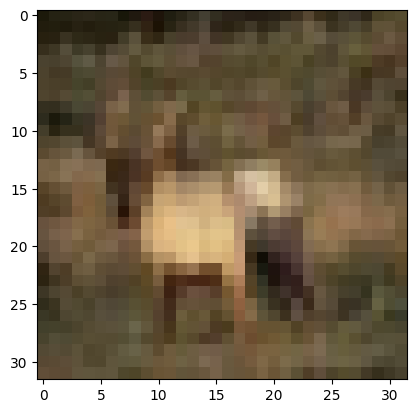

time: 696 ms (started: 2023-12-02 02:36:44 +00:00)


In [16]:
print(len(cifar10))

img, label = cifar10[3]

plt.imshow(img)
plt.show()

In [17]:
from torchvision import transforms

to_tensor = transforms.ToTensor()
img_t = to_tensor(img)
img_t.shape

cifar10_train_t = datasets.CIFAR10(data_path, train = True, download = False, transform = transforms.ToTensor())
cifar10_test_t = datasets.CIFAR10(data_path, train = False, download = False, transform = transforms.ToTensor())


time: 3.48 s (started: 2023-12-02 02:36:48 +00:00)


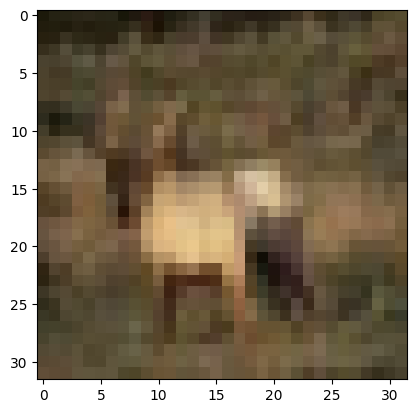

time: 614 ms (started: 2023-12-02 02:36:56 +00:00)


In [18]:
img_t, _ = cifar10_train_t[3]

plt.imshow(img_t.permute(1,2,0))
plt.show()

In [19]:
imgs = torch.stack([img_t for img_t, _ in cifar10_train_t], dim = 3)
#imgs.shape




time: 21.2 s (started: 2023-12-02 02:37:02 +00:00)


In [20]:
imgs.view(3,-1).mean(dim=1)

tensor([0.4914, 0.4822, 0.4465])

time: 74.2 ms (started: 2023-12-02 02:37:33 +00:00)


In [21]:
imgs.view(3,-1).std(dim=1)

tensor([0.2470, 0.2435, 0.2616])

time: 1.34 s (started: 2023-12-02 02:37:34 +00:00)


In [22]:
transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4914, 0.4822, 0.4465), std=(0.247, 0.2435, 0.2616))

time: 3.21 ms (started: 2023-12-02 02:37:37 +00:00)


In [23]:
transformed_cifar10_train = datasets.CIFAR10(data_path, train = True, download = False,
                                            transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))]))

transformed_cifar10_test = datasets.CIFAR10(data_path, train = False, download = False,
                                            transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465),(0.2470, 0.2435, 0.2616))]))

time: 1.12 s (started: 2023-12-02 02:37:38 +00:00)


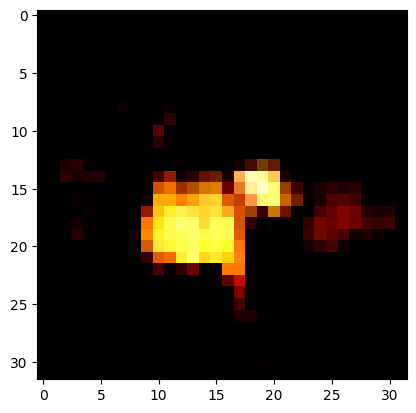

time: 222 ms (started: 2023-12-02 02:37:43 +00:00)


In [24]:
img_t, _ = transformed_cifar10_train[3]

plt.imshow(img_t.permute(1,2,0))
plt.show()

In [25]:
train_loader = torch.utils.data.DataLoader(transformed_cifar10_train, batch_size=64, shuffle=True)

model = nn.Sequential(nn.Linear(3072, 1024), nn.Tanh(), nn.Linear(1024, 512), nn.Tanh(), nn.Linear(512, 128), nn.Tanh(), nn.Linear(128, 10))

optimizer = optim.SGD(model.parameters(), lr=1e-3)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 300

time: 36.6 ms (started: 2023-12-02 02:37:47 +00:00)


In [26]:
for epoch in range(n_epochs):
  for imgs, labels in train_loader:
    batch_size = imgs.shape[0]
    outputs = model(imgs.view(batch_size, -1))
    loss = loss_fn(outputs, labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 2.050289
Epoch: 1, Loss: 1.922693
Epoch: 2, Loss: 2.029209
Epoch: 3, Loss: 1.781149
Epoch: 4, Loss: 1.874188
Epoch: 5, Loss: 1.783465
Epoch: 6, Loss: 2.315026
Epoch: 7, Loss: 1.739989
Epoch: 8, Loss: 1.464028
Epoch: 9, Loss: 1.418788
Epoch: 10, Loss: 2.373549
Epoch: 11, Loss: 1.793804
Epoch: 12, Loss: 1.812761
Epoch: 13, Loss: 2.118927
Epoch: 14, Loss: 1.349009
Epoch: 15, Loss: 1.823378
Epoch: 16, Loss: 1.762349
Epoch: 17, Loss: 1.289120
Epoch: 18, Loss: 1.946903
Epoch: 19, Loss: 2.145898
Epoch: 20, Loss: 1.552913
Epoch: 21, Loss: 1.348760
Epoch: 22, Loss: 1.507125
Epoch: 23, Loss: 1.322017
Epoch: 24, Loss: 1.357930
Epoch: 25, Loss: 1.570827
Epoch: 26, Loss: 1.466363
Epoch: 27, Loss: 1.568586
Epoch: 28, Loss: 2.154317
Epoch: 29, Loss: 1.623081
Epoch: 30, Loss: 1.753347
Epoch: 31, Loss: 1.256924
Epoch: 32, Loss: 1.522239
Epoch: 33, Loss: 1.784459
Epoch: 34, Loss: 1.517133
Epoch: 35, Loss: 1.341196
Epoch: 36, Loss: 1.337351
Epoch: 37, Loss: 1.571165
Epoch: 38, Loss: 2.117

In [27]:

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs_training = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs_training, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f" % (correct / total))

Accuracy: 1.000000
time: 27.2 s (started: 2023-12-02 05:51:15 +00:00)


In [28]:
test_loader = torch.utils.data.DataLoader(transformed_cifar10_test, batch_size=64, shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in test_loader:
        batch_size = imgs.shape[0]
        outputs_testing = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs_testing, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy1: %f" % (correct / total))

Accuracy1: 0.452500
time: 6.17 s (started: 2023-12-02 05:51:46 +00:00)


In [29]:
print(sum([p.numel() for p in model.parameters()]))

3738506
time: 1.59 ms (started: 2023-12-02 05:51:57 +00:00)
